# K suave-r-1.0

In [1]:
using PyPlot

##### Ejecución del código en CUDA


```./float.out B-data/BceroSuave-r-1.0.dat electrodes.dat 4095```



In [4]:
k_suave_r1_nes = readdlm("KsNes/K-Nes-Suave-r-1.0.dat");

In [19]:
k_suave_r1_karel = readdlm("KsKarel/K_Suave_r-1.0-4095.dat");

In [6]:
k_suave_r1_nes

4095x4095 Array{Float64,2}:
 216186.0  222240.0  227814.0  232317.0  …  105882.0  104024.0  102135.0
 222240.0  229596.0  235045.0  239921.0     107772.0  105889.0  103977.0
 227814.0  235045.0  241831.0  246619.0     109619.0  107713.0  105776.0
 232317.0  239921.0  246619.0  252789.0     111414.0  109485.0  107526.0
 235754.0  243700.0  250811.0  256937.0     113153.0  111202.0  109220.0
 238197.0  246427.0  253917.0  260498.0  …  114834.0  112861.0  110857.0
 239748.0  248195.0  256003.0  263004.0     116458.0  114463.0  112437.0
 240528.0  249119.0  257176.0  264532.0     118024.0  116010.0  113963.0
 240650.0  249322.0  257552.0  265188.0     119535.0  117501.0  115435.0
 240227.0  248918.0  257253.0  265092.0     120994.0  118941.0  116854.0
 239356.0  248014.0  256391.0  264361.0  …  122401.0  120330.0  118224.0
 238121.0  246705.0  255069.0  263103.0     123758.0  121669.0  119546.0
 236595.0  245071.0  253379.0  261421.0     125067.0  122961.0  120820.0
      ⋮                

In [21]:
k_suave_r1_karel

4095x4095 Array{Float64,2}:
      4.32371e5  222240.0        …       1.04023e5       1.02135e5
 222240.0             4.59193e5          1.05889e5       1.03977e5
      2.27815e5       2.35046e5          1.07713e5       1.05777e5
 232317.0             2.39921e5          1.09485e5       1.07526e5
      2.35754e5  243700.0           111202.0             1.0922e5 
      2.38197e5       2.46427e5  …       1.12861e5       1.10857e5
      2.39748e5       2.48195e5          1.14463e5       1.12437e5
 240527.0             2.49119e5          1.16009e5       1.13963e5
      2.4065e5        2.49321e5          1.17501e5       1.15434e5
      2.40228e5       2.48918e5          1.18941e5       1.16854e5
      2.39356e5       2.48014e5  …       1.20329e5  118224.0      
      2.38121e5       2.46705e5          1.21669e5       1.19545e5
      2.36594e5       2.45071e5          1.22961e5       1.2082e5 
      ⋮                          ⋱                                
      1.20261e5  122340.0         

##### Dilema de la diagonal (Como es simétrica, aquí tenemos el valor sumado doblemente)

In [22]:
for j in 1:4095
    k_suave_r1_karel[j,j] = k_suave_r1_karel[j,j]/2
end

In [23]:
k_suave_r1_karel

4095x4095 Array{Float64,2}:
      2.16186e5  222240.0        …       1.04023e5       1.02135e5
 222240.0             2.29596e5          1.05889e5       1.03977e5
      2.27815e5       2.35046e5          1.07713e5       1.05777e5
 232317.0             2.39921e5          1.09485e5       1.07526e5
      2.35754e5  243700.0           111202.0             1.0922e5 
      2.38197e5       2.46427e5  …       1.12861e5       1.10857e5
      2.39748e5       2.48195e5          1.14463e5       1.12437e5
 240527.0             2.49119e5          1.16009e5       1.13963e5
      2.4065e5        2.49321e5          1.17501e5       1.15434e5
      2.40228e5       2.48918e5          1.18941e5       1.16854e5
      2.39356e5       2.48014e5  …       1.20329e5  118224.0      
      2.38121e5       2.46705e5          1.21669e5       1.19545e5
      2.36594e5       2.45071e5          1.22961e5       1.2082e5 
      ⋮                          ⋱                                
      1.20261e5  122340.0         

##### Gráfica de la K

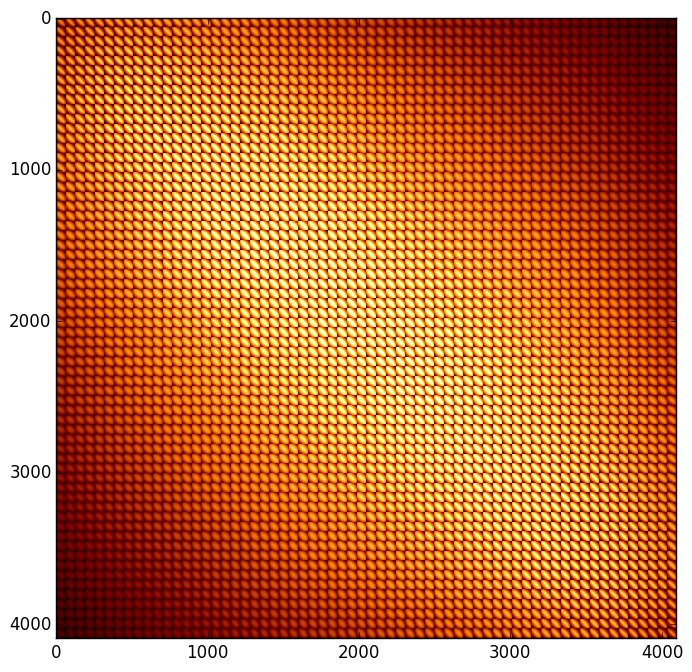

PyObject <matplotlib.image.AxesImage object at 0x3161b7290>

In [24]:
figure(figsize=(8,8))
lala = imshow(k_suave_r1_nes,interpolation="nearest",cmap="afmhot")

##### Error relativo promedio
http://mathworld.wolfram.com/RelativeError.html

In [43]:
error_mat = zeros(4095,4095);

In [63]:
error_calc = 0
for j in 1:4095
    for k in 1:4095
        error_mat[j,k] = ((k_suave_r1_nes[j,k]/k_suave_r1_karel[j,k]) - 1)
        error_calc += error_mat[j,k]
    end
end

In [64]:
error_calc/(4096*4096)

-4.9788890811796266e-9

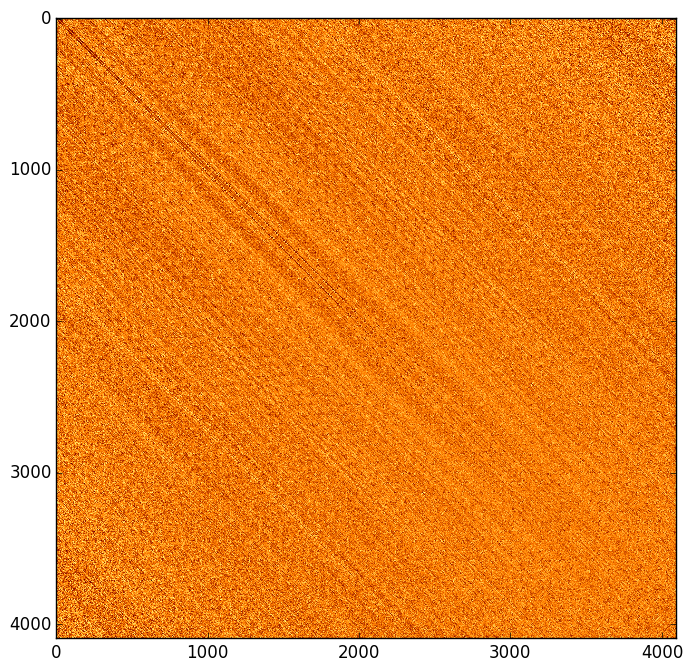

PyObject <matplotlib.image.AxesImage object at 0x349337790>

In [57]:
figure(figsize=(8,8))
lala2 = imshow(error_mat,interpolation="nearest",cmap="afmhot")

# K tilde suave-r-1.0

In [4]:
ktilde_suave_r1_karel = readdlm("KsKarel/KTilde_Suave_r-1.0-4095.dat");

In [6]:
ktilde_suave_r1_karel

4095x4095 Array{Float64,2}:
 339.935   398.267   424.972   429.665   …   29.516    25.9605   21.0773
 354.595   402.196   439.266   451.501       29.7587   26.174    21.2509
 356.462   412.934   440.643   464.164       30.0032   26.3891   21.4258
 348.563   410.326   448.471   463.682       30.2493   26.6058   21.602 
 334.006   397.922   442.93    469.631       30.4971   26.8239   21.7794
 315.466   379.1     427.743   462.305   …   30.7464   27.0435   21.958 
 295.008   356.654   406.368   445.477       30.9972   27.2644   22.1377
 274.115   332.696   381.63    422.627       31.2493   27.4866   22.3184
 253.763   308.698   355.635   396.575       31.5027   27.7099   22.5002
 234.544   285.608   329.838   369.419       31.7573   27.9343   22.6829
 216.77    263.979   305.163   342.597   …   32.0128   28.1596   22.8664
 200.56    244.082   282.136   317.017       32.2693   28.3859   23.0506
 185.914   226.001   261.005   293.19        32.5265   28.6129   23.2356
   ⋮                   

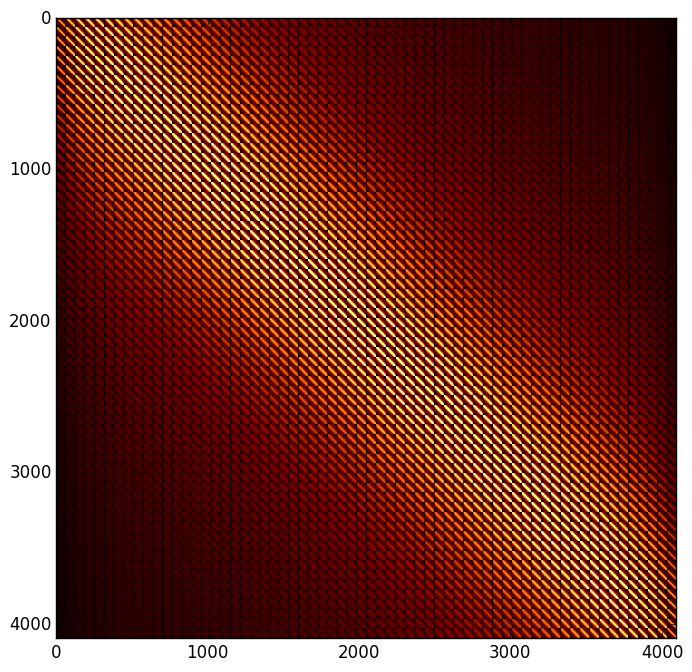

PyObject <matplotlib.image.AxesImage object at 0x32515f750>

In [17]:
figure(figsize=(8,8))
lala2 = imshow(ktilde_suave_r1_karel,interpolation="nearest",cmap="afmhot")

In [7]:
ktilde_suave_r1_nes = readdlm("KsNes/K-Nes-Tilde_Suave_r-1.0-4095.dat");

In [8]:
ktilde_suave_r1_nes

4095x4095 Array{Float64,2}:
 339.935   398.267   424.972   429.665   …   29.516    25.9605   21.0773
 398.267   402.196   439.266   451.501       29.7587   26.174    21.2509
 424.972   439.266   440.643   464.164       30.0032   26.3891   21.4258
 429.665   451.501   464.164   463.682       30.2493   26.6058   21.602 
 420.093   446.635   467.441   478.928       30.4971   26.8239   21.7794
 402.013   430.861   456.757   476.824   …   30.7464   27.0435   21.958 
 379.467   408.804   437.249   462.684       30.9972   27.2644   22.1377
 355.158   383.73    412.817   440.976       31.2493   27.4866   22.3184
 330.804   357.825   386.241   415.151       31.5027   27.7099   22.5002
 307.428   332.467   359.391   387.698       31.7573   27.9343   22.6829
 285.581   308.462   333.442   360.299   …   32.0128   28.1596   22.8664
 265.51    286.223   309.067   334.006       32.2693   28.3859   23.0506
 247.269   265.907   286.598   309.417       32.5265   28.6129   23.2356
   ⋮                   

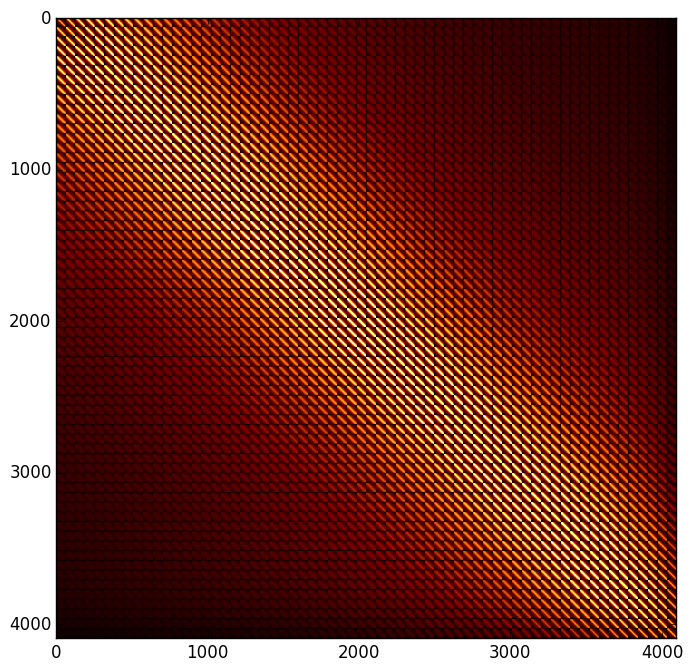

PyObject <matplotlib.image.AxesImage object at 0x3257ea890>

In [18]:
figure(figsize=(8,8))
lala2 = imshow(ktilde_suave_r1_nes,interpolation="nearest",cmap="afmhot")

In [9]:
error_mat = zeros(4095,4095);

In [11]:
error_calc = 0
for j in 1:4095
    for k in 1:4095
        error_mat[j,k] = ((ktilde_suave_r1_nes[j,k]/ktilde_suave_r1_karel[j,k]) - 1)
        error_calc += error_mat[j,k]
    end
end

In [15]:
error_calc/(4095*4095)

0.010727286258718043

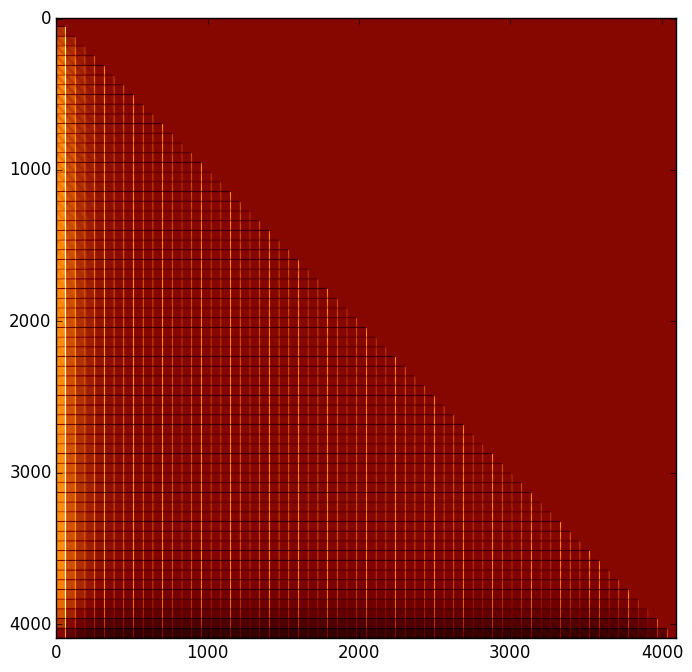

PyObject <matplotlib.image.AxesImage object at 0x322965290>

In [16]:
figure(figsize=(8,8))
lala2 = imshow(error_mat,interpolation="nearest",cmap="afmhot")

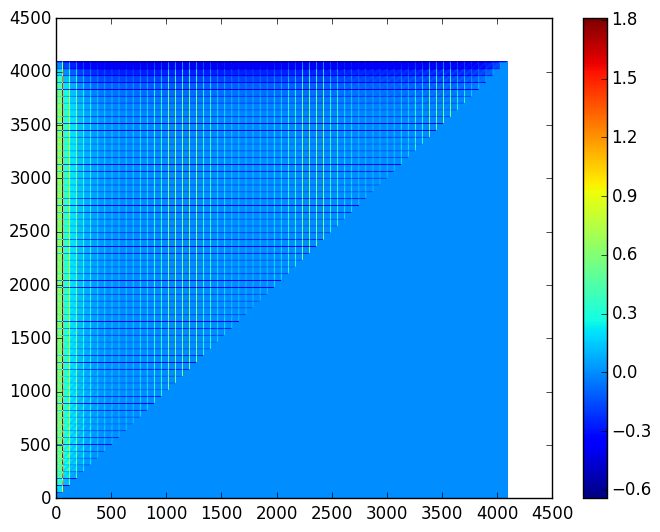

PyObject <matplotlib.colorbar.Colorbar instance at 0x322d5b518>

In [21]:
using PyPlot

M = error_mat
pcolormesh(M)
colorbar()